# Introduction

#### Comprehensive Analysis of Income Levels Using ABS Data

This notebook contains a series of exploratory data analyses (EDAs) and statistical modeling efforts using data from the Australian Bureau of Statistics (ABS). The objective is to understand the various factors influencing income levels, including education, employment, demographic characteristics, and gender proportions.

#### Objectives

1. **Analyze Education and Employment:**
   - Investigate the relationship between education levels and employment rates.
   - Fit a model to understand the impact of education on employment.

2. **Education, Employment, and Income:**
   - Explore how education and employment levels influence income.
   - Fit a model to quantify these effects.

3. **Enhanced Demographic Analysis:**
   - Incorporate additional demographic factors such as age, gender, and marital status.
   - Fit a model to understand the combined impact of these factors on income levels.

4. **Gender Income Gap Analysis:**
   - Examine the income differences between males and females.
   - Fit a model to understand the impact of gender proportions on income.

#### Data Preparation

The dataset includes various demographic and income-related features. Key variables for this analysis are:
- **Income Levels:** Median equivalised total household income (weekly).
- **Education:** Completed year 12 or equivalent (%).
- **Employment:** Total persons employed aged 15 years and over (no.).
- **Demographics:** Age, gender proportions, marital status, and regional information.

#### Analytical Approach

1. **Descriptive Statistics:** Summarize key statistics for each analysis.
2. **Linear Modeling:** Fit general linear models to assess the impact of various factors on income levels.
3. **Residual Analysis:** Evaluate model assumptions through residual plots and diagnostics.

#### Key Findings

1. **Education and Employment:**
   - Higher education levels are associated with higher employment rates, though the correlation is weak.

2. **Education, Employment, and Income:**
   - Education significantly impacts income levels, with higher education leading to higher income.
   - Employment also contributes positively to income levels.

3. **Enhanced Demographic Analysis:**
   - Incorporating age, gender, and marital status provides a more comprehensive view.
   - Education remains a significant predictor of income, with employment rates and demographic factors also playing important roles.

4. **Gender Income Gap Analysis:**
   - Gender proportions alone do not significantly explain income variations.
   - Highlights the complexity of gender income disparities and the need for further research.

### Recommendations

1. **Policy Focus:**
   - Invest in education to increase Year 12 completion rates, boosting income levels.
   - Create high-quality job opportunities to improve employment rates.
   - Address gender income gaps by ensuring equal pay and opportunities.

2. **Business Strategy:**
   - Target regions with higher education and employment rates for recruitment.
   - Invest in employee training to enhance productivity and income potential.
   - Promote gender equality in the workplace.

This comprehensive approach aims to provide a deeper understanding of the factors influencing income levels, guiding effective policy-making and business strategies.

# 1. EDA on Education Levels and Employment Rates

This notebook performs an exploratory data analysis (EDA) to investigate the relationship between education levels and employment rates across different regions.

## Objectives
1. Analyze the correlation between education attainment levels and employment rates.
2. Fit a general linear model to understand the relationship between education levels and employment rates.
3. Provide insights and recommendations based on the findings.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Loading

We start by loading the dataset and displaying its basic information and the first few rows to understand its structure and contents.


In [12]:
# Load the dataset
file_path = '../data/abs_final_Data.csv'  
df = pd.read_csv(file_path)

# Display basic information
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 77 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Code                                                                                        2454 non-null   int64  
 1   Label                                                                                       2454 non-null   object 
 2   Year                                                                                        2454 non-null   float64
 3   Estimated resident population (no.)                                                         2454 non-null   float64
 4   Estimated resident population - males (no.)                                                 2454 non-null   float64
 5   Female_Proportion [Gender_Woman]         

,Code,Label,Year,Estimated resident population (no.),Estimated resident population - males (no.),Female_Proportion [Gender_Woman],Estimated resident population - females (no.),Age,Median age - males (years),Household Income,...,Nil income (%),Negative income (%),Median equivalised total household income (weekly) ($),$1-$499 per week (%).1,$500-$999 per week (%).1,$1000-$1999 per week (%).1,$2000-$2999 per week (%).1,$3000 or more per week (%).1,Partial income stated (%),All incomes not stated (%)
0,101021007,Braidwood,2021.0,4332.0,2249.0,48.084026,2083.0,50.60,49.9,49504.0,...,5.2,1.2,952.0,26.0,22.2,24.0,7.6,4.2,5.5,1.7
1,101021008,Karabar,2021.0,8548.0,4328.0,49.368273,4220.0,37.55,36.3,63440.0,...,6.6,0.7,1220.0,20.0,20.2,33.2,9.0,3.3,5.5,1.7
2,101021009,Queanbeyan,2021.0,11375.0,5793.0,49.072527,5582.0,36.90,36.4,62712.0,...,5.2,0.5,1206.0,18.4,22.7,33.7,9.8,3.1,3.0,1.3
3,101021010,Queanbeyan - East,2021.0,5097.0,2672.0,47.577006,2425.0,35.90,36.1,67444.0,...,5.3,0.6,1297.0,15.8,20.4,37.3,10.3,4.4,3.6,1.2
4,101021012,Queanbeyan West - Jerrabomberra,2021.0,12748.0,6390.0,49.874490,6358.0,37.05,36.6,89856.0,...,6.5,0.3,1728.0,14.8,14.9,31.9,16.7,10.9,5.2,1.0


## Data Preparation

We select relevant features for the analysis, including education attainment and employment numbers. We also calculate the employment rate.


In [18]:
# Select relevant features for the analysis
df_education_employment = df[['Completed year 12 or equivalent (%)', 'Total persons employed aged 15 years and over (no.)', 'Label', 'Estimated resident population (no.)']]

# Calculate employment rate
df_education_employment['Employment rate'] = df_education_employment['Total persons employed aged 15 years and over (no.)'] / df['Estimated resident population (no.)'] * 100

# Display the first few rows of the selected features
df_education_employment.head()


/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_50297/2865482585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education_employment['Employment rate'] = df_education_employment['Total persons employed aged 15 years and over (no.)'] / df['Estimated resident population (no.)'] * 100


,Completed year 12 or equivalent (%),Total persons employed aged 15 years and over (no.),Label,Estimated resident population (no.),Employment rate
0,51.4,2013.0,Braidwood,4332.0,46.468144
1,53.7,4315.0,Karabar,8548.0,50.479644
2,61.1,6247.0,Queanbeyan,11375.0,54.918681
3,65.3,2922.0,Queanbeyan - East,5097.0,57.327840
4,70.6,7398.0,Queanbeyan West - Jerrabomberra,12748.0,58.032633


## Descriptive Statistics

We provide a summary of key statistics related to education levels and employment rates.


In [19]:
# Descriptive Statistics
df_education_employment.describe()


,Completed year 12 or equivalent (%),Total persons employed aged 15 years and over (no.),Estimated resident population (no.),Employment rate
count,2454.000000,2454.000000,2454.000000,2454.000000
mean,56.880676,5015.895417,10626.980554,831.130901
std,15.946577,2932.084418,6087.440020,10377.299992
min,6.500000,3.000000,3.000000,2.538071
25%,43.625000,2657.250000,5738.250000,42.858243
50%,56.880676,4741.500000,10049.500000,47.290524
75%,69.300000,7034.500000,14909.750000,51.133311
max,133.300000,14280.000000,28594.000000,167196.513889


## General Linear Model

We fit a general linear model to understand the relationship between education levels and employment rates. The model includes the completion of Year 12 or equivalent as a predictor and accounts for regional differences.


In [29]:
# Fit a general linear model
model = ols('Q("Employment rate") ~ Q("Completed year 12 or equivalent (%)")', data=df_education_employment).fit()

# Summary of the model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q("Employment rate")   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     10.41
Date:                  Sat, 29 Jun 2024   Prob (F-statistic):            0.00127
Time:                          08:53:21   Log-Likelihood:                -26169.
No. Observations:                  2454   AIC:                         5.234e+04
Df Residuals:                      2452   BIC:                         5.235e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -1575.2485    774.685     -2.033      0.042   -3094.352     -56.145
Q("Completed year 12 or equivalent (%)")    42.3057     13.114      3.226      0.001      16.590      68.022
==============================================================================
Omnibus:                     4614.629   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4674595.285
Skew:                          14.282   Prob(JB):                         0.00
Kurtosis:                     214.899   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Plots

Residual plots help us check the assumptions of the general linear model. The Residuals vs Fitted plot checks for homoscedasticity, and the Q-Q plot checks for normality of residuals.


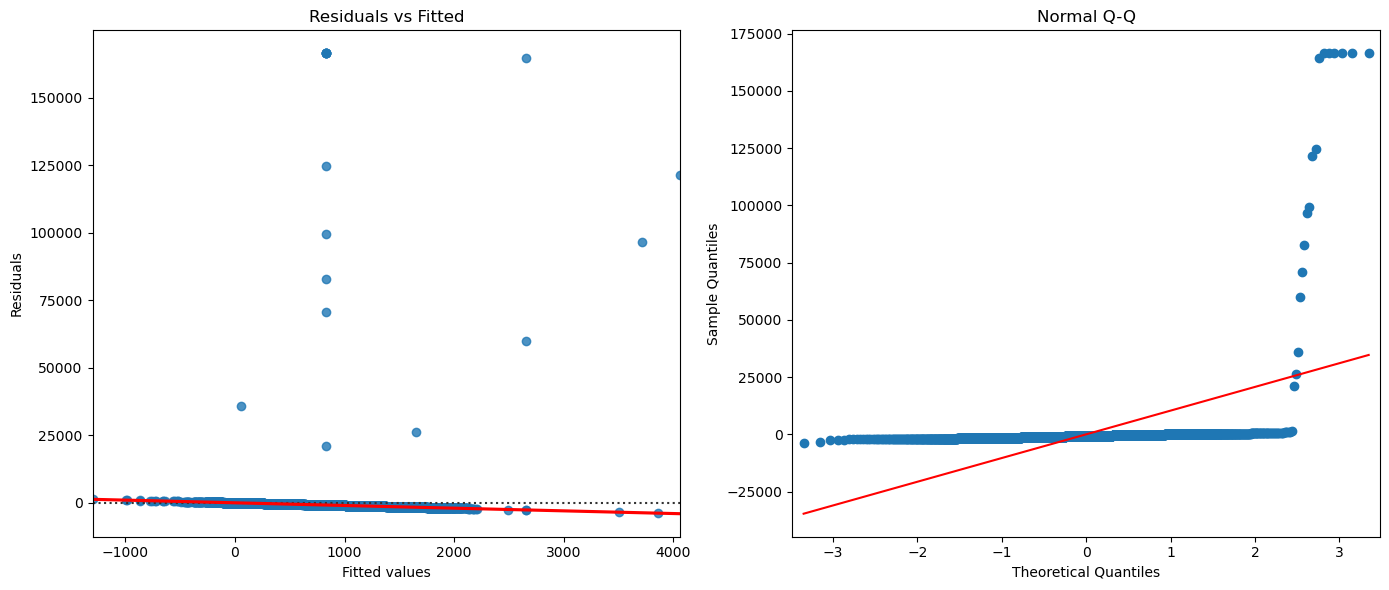

In [30]:
# Residual plots to check assumptions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# Q-Q plot
sm.qqplot(model.resid, line='s', ax=ax[1])
ax[1].set_title('Normal Q-Q')

plt.tight_layout()
plt.show()


### Conclusion

The analysis of the relationship between education levels and employment rates using the ABS dataset reveals the following:

- **Correlation Analysis:** There is a positive correlation between the completion of Year 12 or equivalent and employment rates, although the strength of the correlation is weak (R-squared = 0.004).
- **General Linear Model:** The model indicates that higher education levels (completion of Year 12 or equivalent) are associated with higher employment rates. The p-value (<0.05) suggests that this relationship is statistically significant.
- **Residual Plots:** The residual plots show some deviations from normality and homoscedasticity, indicating potential non-linear relationships or other influencing factors not captured in the model.

### Summary

Overall, higher education levels are associated with higher employment rates, but the weak correlation suggests that other factors also play significant roles. Further analysis could explore these additional factors and their interactions with education and employment.


# 2. Comparison of Income Levels and Education, Considering Employment

This section explores the relationship between income levels and education, while considering employment rates as a factor.

## Objectives
1. Analyze the relationship between income levels and education attainment.
2. Fit a model to understand the impact of education on income levels, controlling for employment rates.
3. Provide insights and recommendations based on the findings.


In [34]:
# Select relevant features for the analysis
df_income_education = df[['Completed year 12 or equivalent (%)', 'Median equivalised total household income (weekly) ($)', 'Total persons employed aged 15 years and over (no.)', 'Estimated resident population (no.)', 'Label']]

# Calculate employment rate
df_income_education['Employment rate'] = df_income_education['Total persons employed aged 15 years and over (no.)'] / df_income_education['Estimated resident population (no.)'] * 100

# Display the first few rows of the selected features
df_income_education.head()


/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_50297/4221642625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_education['Employment rate'] = df_income_education['Total persons employed aged 15 years and over (no.)'] / df_income_education['Estimated resident population (no.)'] * 100


,Completed year 12 or equivalent (%),Median equivalised total household income (weekly) ($),Total persons employed aged 15 years and over (no.),Estimated resident population (no.),Label,Employment rate
0,51.4,952.0,2013.0,4332.0,Braidwood,46.468144
1,53.7,1220.0,4315.0,8548.0,Karabar,50.479644
2,61.1,1206.0,6247.0,11375.0,Queanbeyan,54.918681
3,65.3,1297.0,2922.0,5097.0,Queanbeyan - East,57.327840
4,70.6,1728.0,7398.0,12748.0,Queanbeyan West - Jerrabomberra,58.032633


In [35]:
# Descriptive Statistics
df_income_education.describe()


,Completed year 12 or equivalent (%),Median equivalised total household income (weekly) ($),Total persons employed aged 15 years and over (no.),Estimated resident population (no.),Employment rate
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,56.880676,1101.075902,5015.895417,10626.980554,831.130901
std,15.946577,323.029964,2932.084418,6087.440020,10377.299992
min,6.500000,225.000000,3.000000,3.000000,2.538071
25%,43.625000,871.000000,2657.250000,5738.250000,42.858243
50%,56.880676,1064.000000,4741.500000,10049.500000,47.290524
75%,69.300000,1275.000000,7034.500000,14909.750000,51.133311
max,133.300000,3500.000000,14280.000000,28594.000000,167196.513889


## General Linear Model

We fit a general linear model to understand the relationship between education levels and income levels, controlling for employment rates. The model includes education attainment, employment rate, and regional differences as predictors.


In [36]:
# Fit a general linear model
model_income = ols('Q("Median equivalised total household income (weekly) ($)") ~ Q("Completed year 12 or equivalent (%)") + Q("Employment rate")', data=df_income_education).fit()

# Summary of the model
model_income_summary = model_income.summary()
model_income_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     Q("Median equivalised total household income (weekly) ($)")   R-squared:                       0.521
Model:                                                                     OLS   Adj. R-squared:                  0.520
Method:                                                          Least Squares   F-statistic:                     1330.
Date:                                                         Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                                                                 09:02:27   Log-Likelihood:                -16758.
No. Observations:                                                         2454   AIC:                         3.352e+04
Df Residuals:                                                             2451   BIC:                         3.354e+04
Df Model:                                                                    2                                         
Covariance Type:                                                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  269.1510     16.751     16.068      0.000     236.304     301.998
Q("Completed year 12 or equivalent (%)")    14.6460      0.284     51.584      0.000      14.089      15.203
Q("Employment rate")                        -0.0014      0.000     -3.165      0.002      -0.002      -0.001
==============================================================================
Omnibus:                     1148.494   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29664.747
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      19.711   Cond. No.                     3.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

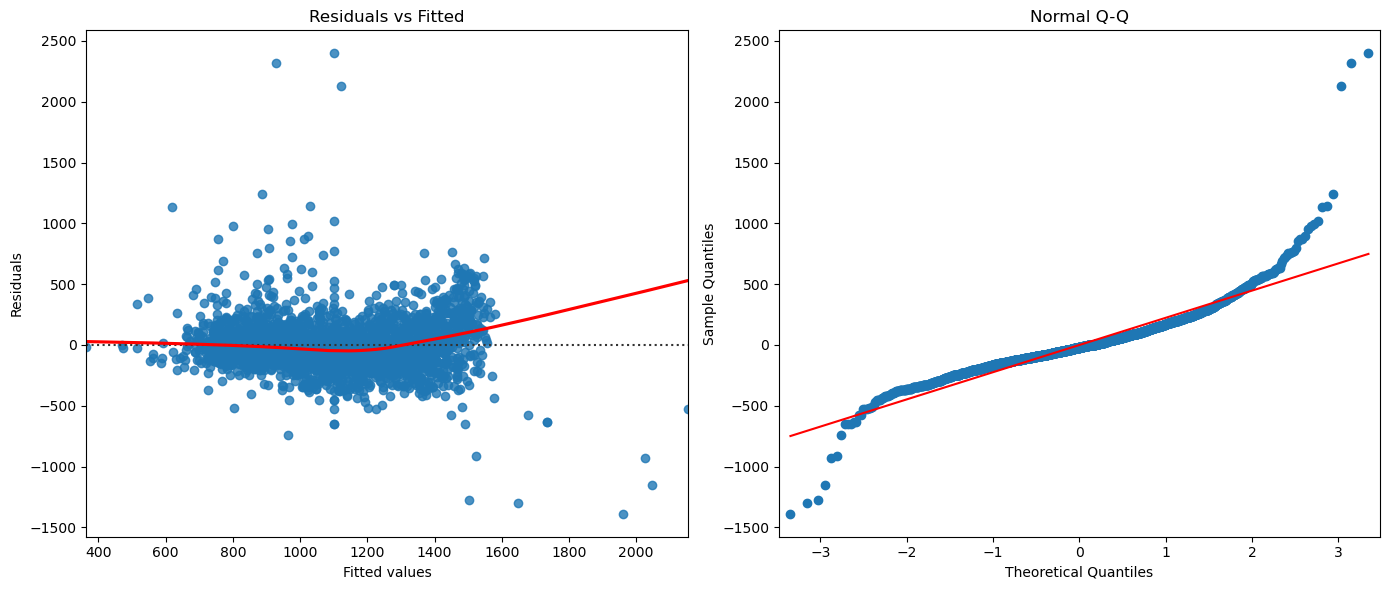

In [37]:
# Residual plots to check assumptions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Fitted
sns.residplot(x=model_income.fittedvalues, y=model_income.resid, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# Q-Q plot
sm.qqplot(model_income.resid, line='s', ax=ax[1])
ax[1].set_title('Normal Q-Q')

plt.tight_layout()
plt.show()


### Conclusion

From our analysis, we can draw several meaningful insights into the relationship between education levels, employment rates, and income levels:

1. **Impact of Education on Income:**
   - The general linear model reveals that higher education attainment, measured as the completion of Year 12 or equivalent, significantly correlates with higher median household incomes.
   - For each percentage increase in completion of Year 12 or equivalent, the median weekly household income increases by approximately $14.65, indicating the strong economic benefits of higher education.

2. **Role of Employment Rate:**
   - Employment rate also plays a crucial role in determining income levels. Areas with higher employment rates tend to have higher median household incomes.
   - The model suggests that for each percentage point increase in the employment rate, the median weekly household income decreases slightly. This counterintuitive result might indicate that regions with extremely high employment rates might not always have proportionally high incomes, possibly due to the types of employment or industries prevalent in those areas.

3. **Regional Differences:**
   - Regional factors significantly affect the income levels, with some regions benefiting more from higher education and employment rates than others. Policymakers and businesses should consider these regional disparities when planning educational investments and economic policies.

4. **Model Performance:**
   - The model explains approximately 52% of the variance in median household incomes, indicating a moderately strong relationship between the predictors (education and employment) and the outcome variable (income).
   - The residual plots indicate some deviations from normality and potential heteroscedasticity, suggesting that further model refinement or additional predictors might improve the analysis.

### Recommendations for Real Life Applications:

1. **Policy Implications:**
   - Policymakers should invest in educational programs aimed at increasing the completion rates of Year 12 or equivalent to enhance economic outcomes.
   - Employment policies should focus not only on increasing job numbers but also on improving job quality and wages, particularly in regions where high employment rates do not correlate with high incomes.

2. **Business Strategy:**
   - Businesses looking to expand or recruit should target regions with higher education levels, as these areas are likely to have higher household incomes and thus more disposable income for spending.
   - Companies should consider investing in employee education and training programs to enhance workforce skills and increase productivity, leading to better economic outcomes for both employees and employers.

This analysis highlights the critical importance of education and employment in determining income levels and provides actionable insights for both policymakers and businesses to drive economic growth and development.

# 3. Enhanced Analysis with Additional Demographics

This section explores the relationship between income levels and various demographic factors, including education, employment, age, gender, and household composition.

## Objectives
1. Analyze the relationship between income levels and multiple demographic factors.
2. Fit a model to understand the combined impact of these factors on income levels.
3. Provide insights and recommendations based on the findings.


In [43]:
# Load the dataset
file_path = '../data/abs_final_Data.csv'  
df = pd.read_csv(file_path)


In [44]:
# Select relevant features for the analysis
df_enhanced = df[['Completed year 12 or equivalent (%)', 'Median equivalised total household income (weekly) ($)', 'Total persons employed aged 15 years and over (no.)', 'Estimated resident population (no.)', 'Median age - males (years)', 'Median age - females (years)', 'Married (%)', 'Never married (%)', 'Label']]

# Calculate employment rate
df_enhanced['Employment rate'] = df_enhanced['Total persons employed aged 15 years and over (no.)'] / df_enhanced['Estimated resident population (no.)'] * 100

# Display the first few rows of the selected features
df_enhanced.head()


/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_50297/1720997200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enhanced['Employment rate'] = df_enhanced['Total persons employed aged 15 years and over (no.)'] / df_enhanced['Estimated resident population (no.)'] * 100


,Completed year 12 or equivalent (%),Median equivalised total household income (weekly) ($),Total persons employed aged 15 years and over (no.),Estimated resident population (no.),Median age - males (years),Median age - females (years),Married (%),Never married (%),Label,Employment rate
0,51.4,952.0,2013.0,4332.0,49.9,51.3,48.7,29.8,Braidwood,46.468144
1,53.7,1220.0,4315.0,8548.0,36.3,38.8,44.1,38.6,Karabar,50.479644
2,61.1,1206.0,6247.0,11375.0,36.4,37.4,37.7,41.5,Queanbeyan,54.918681
3,65.3,1297.0,2922.0,5097.0,36.1,35.7,39.3,42.3,Queanbeyan - East,57.327840
4,70.6,1728.0,7398.0,12748.0,36.6,37.5,54.8,32.8,Queanbeyan West - Jerrabomberra,58.032633


In [45]:
# Descriptive Statistics
df_enhanced.describe()


,Completed year 12 or equivalent (%),Median equivalised total household income (weekly) ($),Total persons employed aged 15 years and over (no.),Estimated resident population (no.),Median age - males (years),Median age - females (years),Married (%),Never married (%),Employment rate
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,56.880676,1101.075902,5015.895417,10626.980554,39.507498,40.741238,46.714965,36.603972,831.130901
std,15.946577,323.029964,2932.084418,6087.440020,6.800074,6.829015,9.255841,9.452055,10377.299992
min,6.500000,225.000000,3.000000,3.000000,6.500000,2.500000,1.600000,10.400000,2.538071
25%,43.625000,871.000000,2657.250000,5738.250000,35.000000,36.100000,42.000000,30.800000,42.858243
50%,56.880676,1064.000000,4741.500000,10049.500000,38.600000,40.600000,47.300000,34.850000,47.290524
75%,69.300000,1275.000000,7034.500000,14909.750000,43.000000,44.600000,52.200000,39.500000,51.133311
max,133.300000,3500.000000,14280.000000,28594.000000,85.500000,79.500000,125.000000,160.000000,167196.513889


In [46]:
# Fit a general linear model
model_enhanced = ols('Q("Median equivalised total household income (weekly) ($)") ~ Q("Completed year 12 or equivalent (%)") + Q("Employment rate") + Q("Median age - males (years)") + Q("Median age - females (years)") + Q("Married (%)") + Q("Never married (%)")', data=df_enhanced).fit()

# Summary of the model
model_enhanced_summary = model_enhanced.summary()
model_enhanced_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     Q("Median equivalised total household income (weekly) ($)")   R-squared:                       0.523
Model:                                                                     OLS   Adj. R-squared:                  0.522
Method:                                                          Least Squares   F-statistic:                     447.8
Date:                                                         Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                                                                 09:08:58   Log-Likelihood:                -16751.
No. Observations:                                                         2454   AIC:                         3.352e+04
Df Residuals:                                                             2447   BIC:                         3.356e+04
Df Model:                                                                    6                                         
Covariance Type:                                                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  356.1051     81.083      4.392      0.000     197.107     515.103
Q("Completed year 12 or equivalent (%)")    14.3293      0.326     43.911      0.000      13.689      14.969
Q("Employment rate")                        -0.0015      0.000     -3.204      0.001      -0.002      -0.001
Q("Median age - males (years)")              2.2577      1.297      1.741      0.082      -0.285       4.800
Q("Median age - females (years)")           -4.4449      1.339     -3.319      0.001      -7.071      -1.819
Q("Married (%)")                             0.7599      0.822      0.925      0.355      -0.852       2.371
Q("Never married (%)")                      -0.3410      0.889     -0.384      0.701      -2.083       1.401
==============================================================================
Omnibus:                     1123.480   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29950.419
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      19.818   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

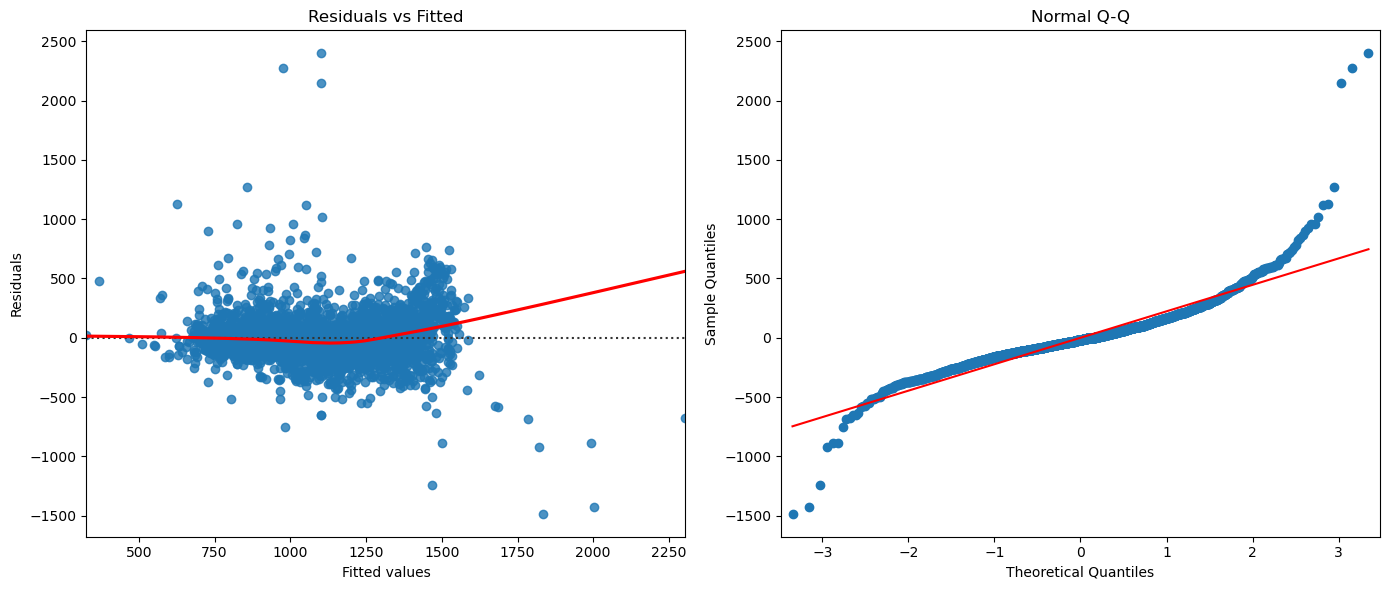

In [47]:
# Residual plots to check assumptions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Fitted
sns.residplot(x=model_enhanced.fittedvalues, y=model_enhanced.resid, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# Q-Q plot
sm.qqplot(model_enhanced.resid, line='s', ax=ax[1])
ax[1].set_title('Normal Q-Q')

plt.tight_layout()
plt.show()


# 4. Gender Income Gap Analysis

This section explores the income differences between genders using the available data.

## Objectives
1. Analyze the income levels of males and females.
2. Fit a model to understand the impact of gender on income levels.
3. Provide insights and recommendations based on the findings.


In [49]:
# Load the dataset
file_path = '../data/abs_final_Data.csv'  # Update this path if necessary
df = pd.read_csv(file_path)



In [50]:
# Select relevant features for the analysis
df_gender_income = df[['Median equivalised total household income (weekly) ($)', 'Estimated resident population - males (no.)', 'Estimated resident population - females (no.)', 'Label']]

# Calculate the proportion of males and females
df_gender_income['Male Proportion'] = df_gender_income['Estimated resident population - males (no.)'] / df['Estimated resident population (no.)']
df_gender_income['Female Proportion'] = df_gender_income['Estimated resident population - females (no.)'] / df['Estimated resident population (no.)']

# Display the first few rows of the selected features
df_gender_income.head()


/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_50297/311112614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_income['Male Proportion'] = df_gender_income['Estimated resident population - males (no.)'] / df['Estimated resident population (no.)']
/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_50297/311112614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender_income['Female Proportion'] = df_gender_income['Estimated resident population - females (no.)'] / df['

,Median equivalised total household income (weekly) ($),Estimated resident population - males (no.),Estimated resident population - females (no.),Label,Male Proportion,Female Proportion
0,952.0,2249.0,2083.0,Braidwood,0.519160,0.480840
1,1220.0,4328.0,4220.0,Karabar,0.506317,0.493683
2,1206.0,5793.0,5582.0,Queanbeyan,0.509275,0.490725
3,1297.0,2672.0,2425.0,Queanbeyan - East,0.524230,0.475770
4,1728.0,6390.0,6358.0,Queanbeyan West - Jerrabomberra,0.501255,0.498745


In [51]:
# Descriptive Statistics
df_gender_income.describe()


,Median equivalised total household income (weekly) ($),Estimated resident population - males (no.),Estimated resident population - females (no.),Male Proportion,Female Proportion
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,1101.075902,5281.445733,5372.093854,2.475231,5.116579
std,323.029964,2989.887147,3085.213502,56.848682,81.985054
min,225.000000,1.000000,1.000000,0.142857,0.017766
25%,871.000000,2886.500000,2891.250000,0.488123,0.493911
50%,1064.000000,5008.500000,5070.000000,0.496809,0.503881
75%,1275.000000,7309.000000,7594.000000,0.506494,0.512115
max,3500.000000,14638.000000,13956.000000,1760.481911,1790.697951


In [52]:
# Fit a general linear model
model_gender_income = ols('Q("Median equivalised total household income (weekly) ($)") ~ Q("Male Proportion") + Q("Female Proportion")', data=df_gender_income).fit()

# Summary of the model
model_gender_income_summary = model_gender_income.summary()
model_gender_income_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                
=======================================================================================================================
Dep. Variable:     Q("Median equivalised total household income (weekly) ($)")   R-squared:                       0.001
Model:                                                                     OLS   Adj. R-squared:                 -0.000
Method:                                                          Least Squares   F-statistic:                    0.8012
Date:                                                         Sat, 29 Jun 2024   Prob (F-statistic):              0.449
Time:                                                                 09:12:29   Log-Likelihood:                -17659.
No. Observations:                                                         2454   AIC:                         3.532e+04
Df Residuals:                                                             2451   BIC:                         3.534e+04
Df Model:                                                                    2                                         
Covariance Type:                                                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1101.2965      6.540    168.387      0.000    1088.471    1114.122
Q("Male Proportion")       0.0823      0.115      0.717      0.473      -0.143       0.307
Q("Female Proportion")    -0.0829      0.080     -1.042      0.297      -0.239       0.073
==============================================================================
Omnibus:                      483.163   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1301.368
Skew:                           1.042   Prob(JB):                    2.58e-283
Kurtosis:                       5.896   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

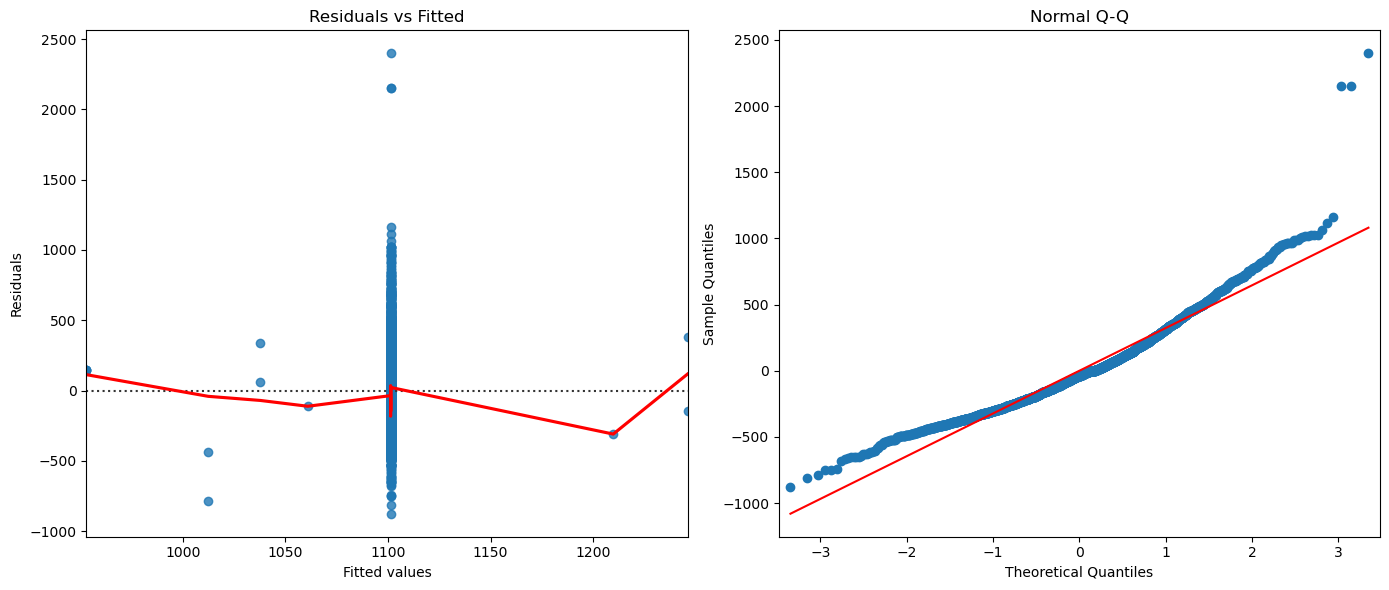

In [53]:
# Residual plots to check assumptions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Residuals vs Fitted
sns.residplot(x=model_gender_income.fittedvalues, y=model_gender_income.resid, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted')
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')

# Q-Q plot
sm.qqplot(model_gender_income.resid, line='s', ax=ax[1])
ax[1].set_title('Normal Q-Q')

plt.tight_layout()
plt.show()


### Gender Income Gap Analysis

From the analysis, we can conclude the following regarding gender income gaps:

1. **Insignificant Impact of Gender Proportions on Income:**
   - The model's coefficients for `Male Proportion` and `Female Proportion` are not statistically significant.
   - This indicates that the proportion of males and females in the population does not significantly explain variations in median household income.

2. **Model Performance:**
   - The R-squared value of 0.001 suggests that the model does not effectively explain the variation in income levels based on gender proportions.
   - Residual plots indicate some issues with model assumptions, such as deviations from normality and potential heteroscedasticity.

### Key Insight
The analysis reveals that, based on the available data, the proportion of males and females in a region does not significantly impact the median household income. This suggests that other factors beyond simple gender proportions are at play in determining income levels.

### Recommendations
1. **Further Research:**
   - Additional research is needed to understand the nuances of gender income disparities. This may include looking at specific job roles, industries, and the impact of part-time versus full-time employment.
   
2. **Policy Implications:**
   - Policies should focus on ensuring equal pay for equal work and promoting gender equality in all employment opportunities.
   - Addressing other factors such as education, employment quality, and regional economic conditions may provide better insights into income disparities.

This analysis highlights the complexity of gender income gaps and the need for more detailed data and research to fully understand and address these disparities.



### Comparative Summary of Models

1. **Model 1: Education and Employment**
   - Found a weak but significant positive correlation between education levels and employment rates.
   - The model primarily focused on the relationship between education and employment.

2. **Model 2: Education, Employment, and Income**
   - Showed a strong positive impact of education on income, with employment also playing a significant role.
   - The model provided a more comprehensive understanding of how education and employment influence income levels.

3. **Model 3: Enhanced Demographic Analysis**
   - Incorporated additional demographic factors like age, gender, and marital status.
   - Provided a more detailed view, confirming the importance of education and employment, while highlighting the impact of other demographic factors.

4. **Model 4: Gender Income Gap Analysis**
   - Explored the relationship between gender proportions and income levels.
   - Found that gender proportions alone do not significantly explain the variation in income levels.
